In [1]:
from copy import deepcopy
import numpy as np
import os
import sys

sys.path.insert(0, '/home/mattw/Dropbox/research-code/psvae_utils')

from behavenet import get_user_dir
from behavenet.fitting.utils import get_session_dir, get_expt_dir, get_lab_example
from behavenet.fitting.utils import experiment_exists, get_best_model_and_data
from behavenet.plotting.cond_ae_utils import get_model_input, get_input_range, interpolate_point_path
from behavenet.plotting.cond_ae_utils import make_interpolated_multipanel

from params.ibl_ms import params_dict as hp
from cond_ae import make_reconstruction_movie_wrapper

In [2]:
train_frac = '1.0'
model_class = 'msps-vae'

sessions_csv = '/home/mattw/Dropbox/research-code/conditional-aes/4-session.csv'
n_latents = 4
n_background = 3
alpha_expt_name = 'iters-200_frac-1.0'
beta_delta_expt_name = 'iters-200_frac-1.0'

raw_data_path = hp['raw_data_path']
n_labels = hp['n_labels']
label_names = hp['label_names']

# best model
best_alpha = hp['best_alpha']
best_beta = hp['best_beta']
best_gamma = hp['best_gamma']
best_delta = hp['best_delta']
best_rng = hp['best_rng']

# label reconstructions
xtick_locs = hp['xtick_locs']

In [3]:
from behavenet.plotting.cond_ae_utils import _get_psvae_hparams

hparams = _get_psvae_hparams(
    model_class=model_class,
    experiment_name='iters-200_frac-1.0',
    n_ae_latents=n_latents + n_background + n_labels,
    n_background=n_background,
    n_sessions_per_batch=2, device='cpu')

hparams['sessions_csv'] = sessions_csv
get_lab_example(hparams, 'ibl', 'ephys')
hparams['session_dir'], sess_ids = get_session_dir(hparams)
hparams['expt_dir'] = get_expt_dir(hparams)

multisession_dir = hparams['session_dir'].split('/')[-1]
base_save_dir = os.path.join(
    get_user_dir('fig'), 'single-view', multisession_dir, model_class)

In [4]:
# sess_ids

Loading model defined in /media/mattw/ibl/results/single-view/multisession-00/msps-vae/conv/11_latents/iters-200_frac-1.0/version_18/meta_tags.pkl
Loading model defined in /media/mattw/ibl/results/single-view/multisession-00/vae/conv/11_latents/iters-200_frac-1.0/version_0/meta_tags.pkl
Loading model defined in /media/mattw/ibl/results/single-view/multisession-00/labels-images/conv/iters-200_frac-1.0/version_0/meta_tags.pkl
processing frame 000/399
processing frame 100/399
processing frame 200/399
processing frame 300/399
saving video to /media/mattw/ibl/figs/single-view/multisession-00/msps-vae/reconstructions_a=50_b=10_d=50_n=4_r=3.mp4...done


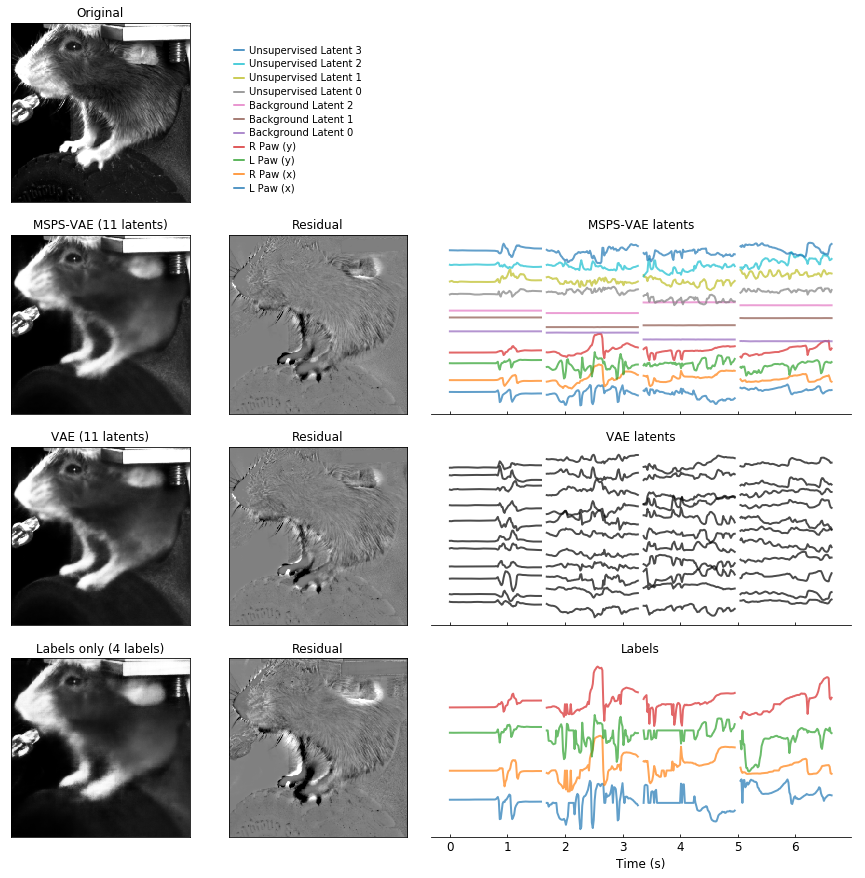

In [7]:
hparams['ps_vae.alpha'] = best_alpha
hparams['ps_vae.beta'] = best_beta
hparams['ps_vae.delta'] = best_delta
hparams['n_ae_latents'] = n_latents + n_background + n_labels
hparams['rng_seed_model'] = best_rng
hparams['n_sessions_per_batch'] = 2
hparams['n_background'] = 3
hparams['n_sessions_per_batch'] = 1
hparams['n_labels'] = 4


msps_version = 18
vae_version = 0
labels = ['L Paw (x)', 'R Paw (x)', 'L Paw (y)', 'R Paw (y)', 
          'Background Latent 0', 'Background Latent 1', 'Background Latent 2',
          'Unsupervised Latent 0', 'Unsupervised Latent 1', 'Unsupervised Latent 2', 
          'Unsupervised Latent 3']
trials = [19, 19, 19, 29]  # need to keep final trial different for dumb plotting reasons
sess_idx = [0, 1, 2, 3]
xtick_locs = [0, 60, 120, 180, 240, 300, 360]
frame_rate = 10

model_info = [
    {
        'model_class': 'msps-vae',
        'title': 'MSPS-VAE (%i latents)' % hparams['n_ae_latents'],
        'experiment_name': 'iters-200_frac-1.0',
        'version': 18},
    {
        'model_class': 'vae',
        'title': 'VAE (%i latents)' % hparams['n_ae_latents'],
        'experiment_name': 'iters-200_frac-1.0',
        'version': 0},
    {
        'model_class': 'labels-images',
        'title': 'Labels only (%i labels)' % n_labels,
        'experiment_name': 'iters-200_frac-1.0',
        'version': 0},
]

save_file = os.path.join(
    base_save_dir,
    'reconstructions_a={}_b={}_d={}_n={}_r={}'.format(
    best_alpha, best_beta, best_delta, n_latents, best_rng))

make_reconstruction_movie_wrapper(
    hparams, save_file=save_file, trial_idxs=None, trials=trials, sess_idx=sess_idx, 
    model_info=model_info, add_traces=True, label_names=labels, xtick_locs=xtick_locs, 
    frame_rate=frame_rate)

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
